In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
data = pd.read_csv('/content/drive/MyDrive/walmart_product_reviews_dataset.csv')

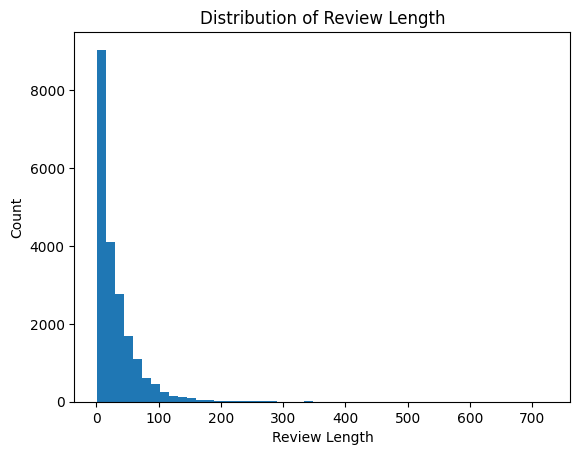

In [6]:
data['review_length'] = data['content'].apply(lambda x: len(str(x).split()))
plt.hist(data['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Length')
plt.show()

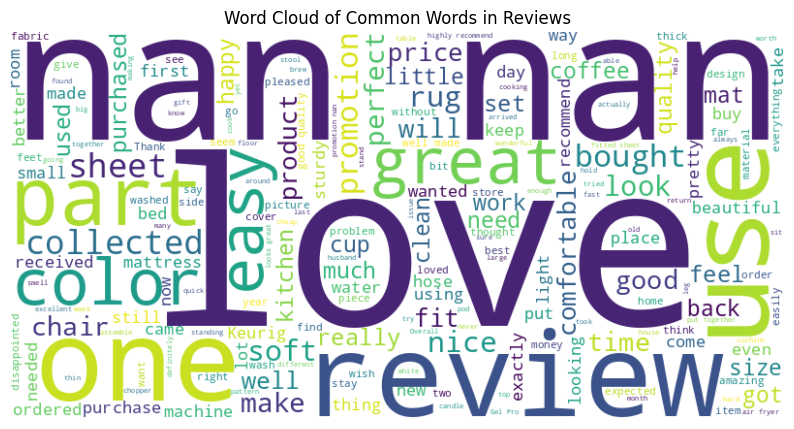

In [7]:
all_reviews = ' '.join(data['content'].apply(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews')
plt.show()

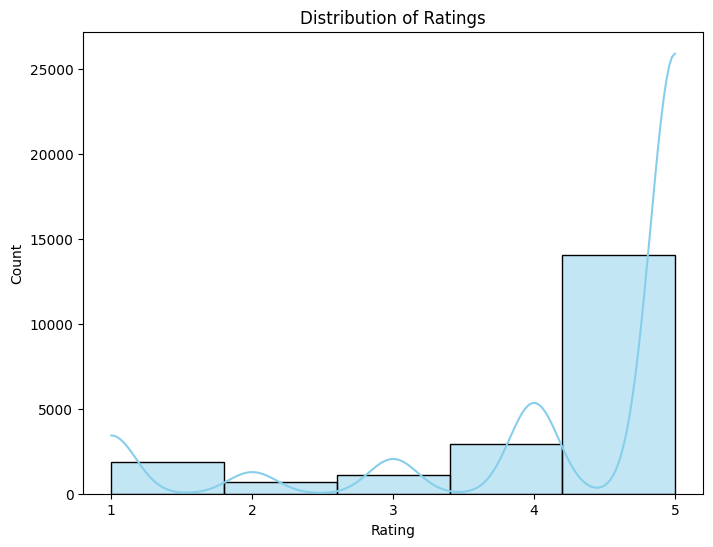

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()

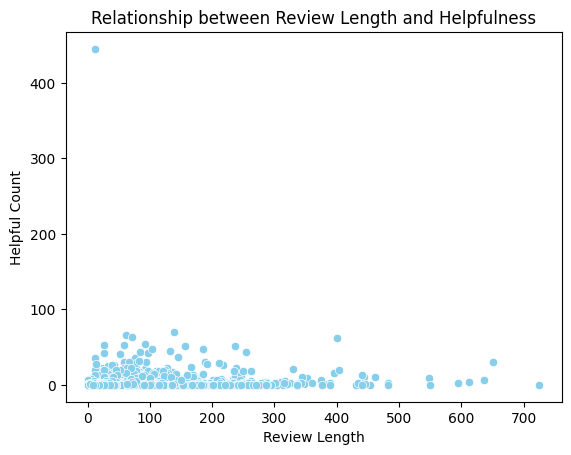

In [9]:
sns.scatterplot(x='review_length', y='helpful_count', data=data, color='skyblue')
plt.title('Relationship between Review Length and Helpfulness')
plt.xlabel('Review Length')
plt.ylabel('Helpful Count')
plt.show()

In [10]:
average_rating = data['rating'].mean()
print(f"\nAverage Rating: {average_rating:.2f}")

verified_counts = data['verified'].value_counts()
print("\nCount of Verified and Non-Verified Reviews:")
print(verified_counts)

average_helpful_count = data['helpful_count'].mean()
average_not_helpful_count = data['not_helpful_count'].mean()
print(f"\nAverage Helpful Count: {average_helpful_count:.2f}")
print(f"Average Not Helpful Count: {average_not_helpful_count:.2f}")


Average Rating: 4.29

Count of Verified and Non-Verified Reviews:
True     11481
False     9158
Name: verified, dtype: int64

Average Helpful Count: 0.41
Average Not Helpful Count: 0.08


In [11]:
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 crawled_at              0
verified                0
reviewed_at             0
reviewed_by            13
helpful_count           0
not_helpful_count       0
content              4431
raw_content             0
average_rating       1030
review_heading       6619
product_url             0
review_page_url         0
rating                  0
review_length           0
dtype: int64


In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

In [15]:
data['cleaned_text'] = data['content'].apply(preprocess_text)

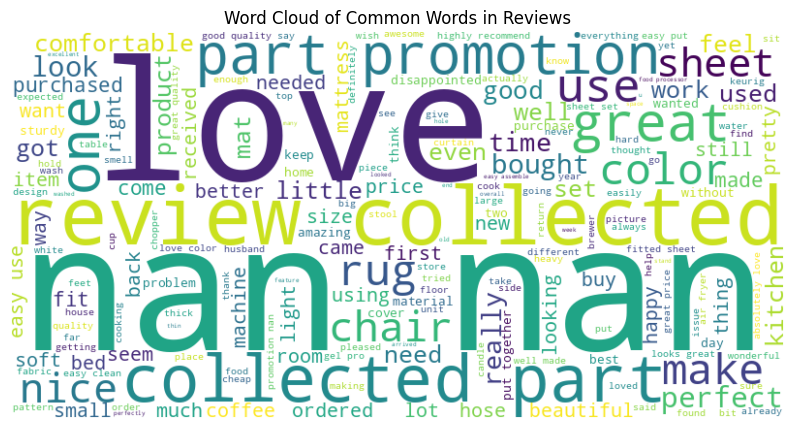

In [16]:
all_reviews = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews')
plt.show()

In [17]:
from textblob import TextBlob

data['sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=30, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
word_frequencies = tfidf_matrix.sum(axis=0)

word_frequencies_df = pd.DataFrame(word_frequencies, columns=feature_names)


In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
def get_sentiment_scores(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return None

In [22]:
data['sentiment_scores'] = data['content'].apply(get_sentiment_scores)

In [31]:
def categorize_sentiment(sentiment_score):
    if pd.notnull(sentiment_score):
        if sentiment_score > 0:
            return 'positive'
        elif sentiment_score < 0:
            return 'negative'
    return 'neutral'

In [32]:
data['sentiment'] = data['sentiment_scores'].apply(categorize_sentiment)

# Count the number of positive, negative, and neutral reviews
sentiment_counts = data['sentiment'].value_counts()

In [33]:
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
positive    13784
neutral      5221
negative     1634
Name: sentiment, dtype: int64


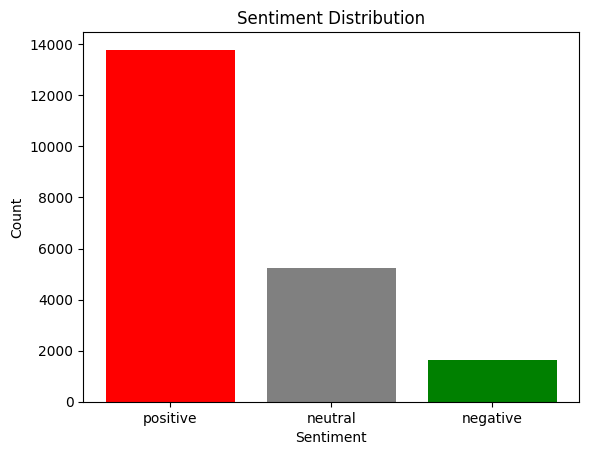

In [34]:
plt.bar(sentiment_counts.index, sentiment_counts, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()